In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

In [7]:
other_path = 'C:\\Users\\Akanksha\\Desktop\\BankData.csv'
df = pd.read_csv(other_path)
df

,cont1,cont2,cont3,bool1,bool2,cont4,bool3,cont5,cont6,approval,credit.score,ages
0,30.83,0.000,1.25,t,t,1,f,202.0,0,+,664.60,42
1,58.67,4.460,3.04,t,t,6,f,43.0,560,+,693.88,54
2,24.50,0.500,1.50,t,f,0,f,280.0,824,+,621.82,29
3,27.83,1.540,3.75,t,t,5,t,100.0,3,+,653.97,58
4,20.17,5.625,1.71,t,f,0,f,120.0,0,+,670.26,65
...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,f,f,0,f,260.0,0,-,736.22,34
686,22.67,0.750,2.00,f,t,2,t,200.0,394,-,643.56,46
687,25.25,13.500,2.00,f,t,1,t,200.0,1,-,665.36,46
688,17.92,0.205,0.04,f,f,0,f,280.0,750,-,716.15,42


In [20]:
df.isnull().sum()

cont1           12
cont2            0
cont3            0
bool1            0
bool2            0
cont4            0
bool3            0
cont5           13
cont6            0
approval         0
credit.score     0
ages             0
dtype: int64

In [21]:
df.isna().sum()

cont1           12
cont2            0
cont3            0
bool1            0
bool2            0
cont4            0
bool3            0
cont5           13
cont6            0
approval         0
credit.score     0
ages             0
dtype: int64

In [33]:
df = df[df.cont1.notnull()]
df = df[df.cont5.notnull()]
df.isnull().sum()

cont1           0
cont2           0
cont3           0
bool1           0
bool2           0
cont4           0
bool3           0
cont5           0
cont6           0
approval        0
credit.score    0
ages            0
dtype: int64

In [38]:
df2 = df.copy()
columns = list(df2.columns)
df2[columns]
df2['cont1'] = (df2['cont1'] - df2['cont1'].mean())/df2['cont1'].std(ddof=0)
df2['cont1']
print(df2['cont1'])

#New Max/Min values after z-score normalization
print("New Max Value after z score normalization", df2['cont1'].max())
print("New Min Value after z score normalization", df2['cont1'].min())
print("Old Max Value",df['cont1'].max())
print("Old Min Value",df['cont1'].min())

0     -0.062047
1      2.275245
2     -0.593478
3     -0.313910
4     -0.957001
         ...   
685   -0.880603
686   -0.747115
687   -0.530513
688   -1.145899
689    0.288043
Name: cont1, Length: 666, dtype: float64
New Max Value after z score normalization 4.0869816896339195
New Min Value after z score normalization -1.495988753513139
Old Max Value 80.25
Old Min Value 13.75


array([[<AxesSubplot:title={'center':'ages'}>,
        <AxesSubplot:title={'center':'credit.score'}>]], dtype=object)

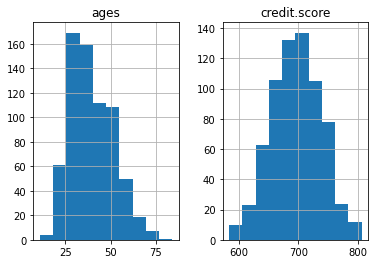

In [38]:
df.hist(column=["ages","credit.score"]) 


array([[<AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont5'}>]], dtype=object)

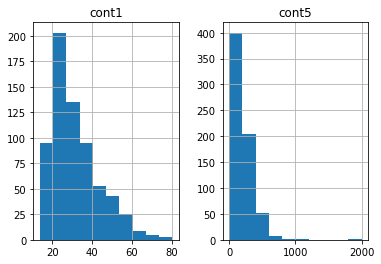

In [30]:
df.hist(column=["cont1","cont5"]) 

array([[<AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>]], dtype=object)

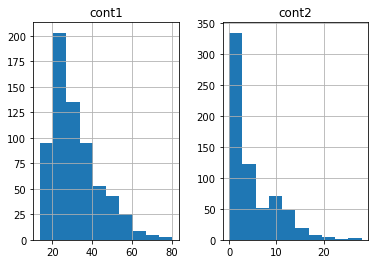

In [29]:
df.hist(column=["cont1","cont2"]) 

array([[<AxesSubplot:title={'center':'cont3'}>,
        <AxesSubplot:title={'center':'cont4'}>]], dtype=object)

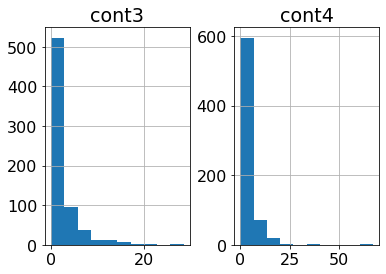

In [63]:
df.hist(column=["cont3","cont4"]) 

array([[<AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>]], dtype=object)

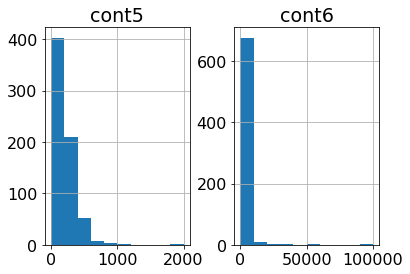

In [65]:
df.hist(column=["cont5","cont6"]) 

<AxesSubplot:>

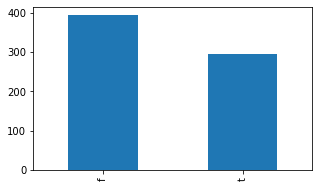

In [147]:
df['bool2'].value_counts().plot(kind='bar',figsize=(5,3))

<AxesSubplot:>

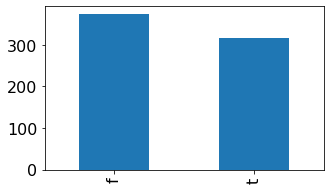

In [56]:
df['bool3'].value_counts().plot(kind='bar',figsize=(5,3))

<AxesSubplot:>

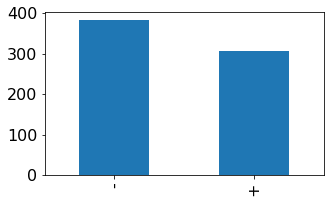

In [67]:
df['approval'].value_counts().plot(kind='bar',figsize=(5,3))

In [69]:
df.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,credit.score,ages
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,696.385130,39.673913
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,41.926375,11.735203
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,583.660000,11.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,666.747500,31.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,697.285000,38.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,726.355000,48.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,806.000000,84.000000


In [72]:
df.median()

cont1            28.460
cont2             2.750
cont3             1.000
cont4             0.000
cont5           160.000
cont6             5.000
credit.score    697.285
ages             38.000
dtype: float64

In [87]:
from scipy import stats 
df_copy['cont1']

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: cont1, Length: 690, dtype: float64

In [101]:
#z-score normalization
df2 = df.copy()
columns = list(df2.columns)
df2[columns]
df2['cont1'] = (df2['cont1'] - df2['cont1'].mean())/df2['cont1'].std(ddof=0)
df2['cont1']

0     -0.061777
1      2.268118
2     -0.591526
3     -0.312843
4     -0.953898
         ...   
685   -0.877742
686   -0.744677
687   -0.528760
688   -1.142198
689    0.287205
Name: cont1, Length: 690, dtype: float64

In [131]:
#New Max/Min values after z-score normalization
print(df2['cont1'].max())
print(df2['cont1'].min())
print("Old Max Value",df['cont1'].max())
print("Old Min Value",df['cont1'].min())

4.0741202478115826
-1.4911800408935048
Old Max Value 80.25
Old Min Value 13.75


array([[<AxesSubplot:title={'center':'cont1'}>]], dtype=object)

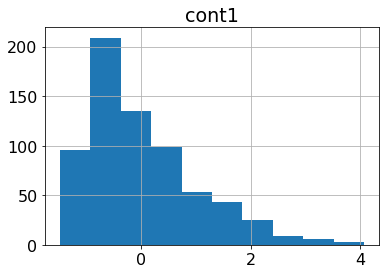

In [102]:
df2.hist(column=["cont1"]) 

array([[<AxesSubplot:title={'center':'cont1'}>]], dtype=object)

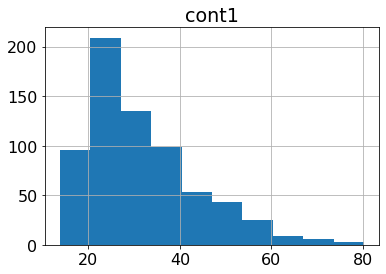

In [103]:
df.hist(column=["cont1"]) 

In [125]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    df_norm['cont2'] = (df_norm['cont2'] - df_norm['cont2'].min()) / (df_norm['cont2'].max() - df_norm['cont2'].min())   
    return df_norm
# call the min_max_scaling function
df_cont2_normalized = min_max_scaling(df)
df_cont2_normalized['cont2']

0      0.000000
1      0.159286
2      0.017857
3      0.055000
4      0.200893
         ...   
685    0.360179
686    0.026786
687    0.482143
688    0.007321
689    0.120536
Name: cont2, Length: 690, dtype: float64

array([[<AxesSubplot:title={'center':'cont2'}>]], dtype=object)

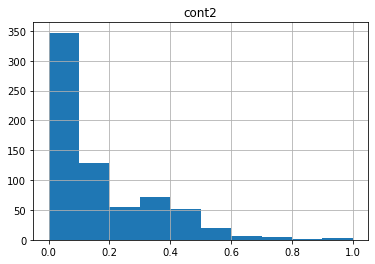

In [112]:
df_cont2_normalized.hist(column=["cont2"]) 

array([[<AxesSubplot:title={'center':'cont2'}>]], dtype=object)

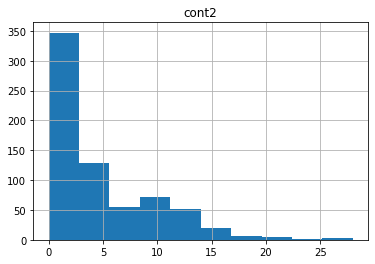

In [114]:
df.hist(column=["cont2"]) 

In [120]:
df3 = df.copy()
def Dec_scale(df):
        p = df3['cont3'].max()
        q = len(str(abs(p)))
        df3['cont3'] = df3['cont3']/10**q 
        
Dec_scale(df3['cont3'])
df3['cont3']

0      0.000125
1      0.000304
2      0.000150
3      0.000375
4      0.000171
         ...   
685    0.000125
686    0.000200
687    0.000200
688    0.000004
689    0.000829
Name: cont3, Length: 690, dtype: float64

array([[<AxesSubplot:title={'center':'cont3'}>]], dtype=object)

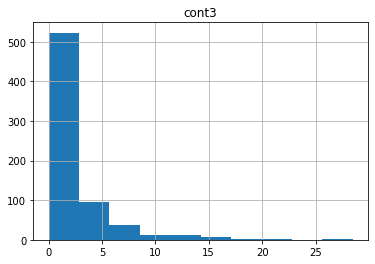

In [122]:
df.hist(column=["cont3"]) 

array([[<AxesSubplot:title={'center':'cont3'}>]], dtype=object)

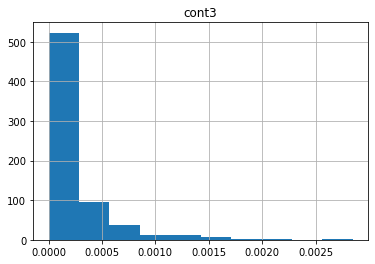

In [123]:
df3.hist(column=["cont3"]) 

In [32]:
df3

NameError: name 'df3' is not defined

In [42]:
data = df['cont1'].tolist()

In [82]:
#Binning 

def equiwidthbinning(arr1, m): 
    a = len(arr1) 
    w = int((max(arr1) - min(arr1)) / m) 
    min1 = min(arr1) 
    arr = [] 
    for i in range(0, m + 1): 
        arr = arr + [min1 + w * i] 
    arri=[] 
      
    for i in range(0, m): 
        temp = [] 
        for j in arr1: 
            if j >= arr[i] and j <= arr[i+1]: 
                temp += [j] 
        arri += [temp] 
    return arri

In [87]:
v_bins = equiwidthbinning(data, 4)
print(equiwidthbinning(data, 4))

[[24.5, 27.83, 20.17, 22.92, 22.08, 28.25, 23.25, 21.83, 19.17, 25.0, 23.25, 27.42, 15.83, 29.25, 22.58, 27.83, 27.25, 23.0, 27.75, 28.92, 29.67, 23.92, 25.75, 26.0, 23.33, 23.17, 23.42, 20.42, 26.67, 25.5, 19.42, 20.67, 19.17, 21.67, 21.5, 27.67, 27.25, 25.67, 28.75, 28.58, 23.0, 22.5, 28.5, 18.67, 25.0, 27.83, 28.75, 25.0, 19.75, 29.17, 24.5, 24.58, 20.67, 25.42, 20.75, 25.67, 24.75, 23.5, 22.75, 28.42, 20.42, 18.83, 26.92, 22.33, 27.25, 23.25, 23.08, 21.67, 28.5, 28.0, 27.67, 25.08, 19.33, 25.08, 22.67, 27.0, 25.0, 26.08, 18.42, 20.17, 21.25, 20.67, 22.42, 28.67, 21.33, 22.67, 28.25, 27.58, 22.58, 24.08, 20.75, 28.67, 24.33, 23.08, 26.67, 18.92, 17.58, 18.83, 23.25, 18.08, 22.5, 19.67, 22.08, 25.17, 27.67, 20.67, 26.17, 21.33, 20.5, 28.33, 18.5, 19.67, 24.5, 21.83, 17.83, 23.17, 18.17, 20.0, 20.0, 20.75, 24.5, 20.42, 17.08, 18.33, 18.0, 18.08, 18.58, 19.17, 18.17, 16.25, 21.17, 23.92, 17.67, 16.5, 23.25, 17.58, 29.5, 18.83, 21.75, 23.0, 18.25, 25.42, 16.08, 16.33, 22.17, 18.25, 23.4

In [ ]:
v_bins = equiwidthbinning(data, 4)

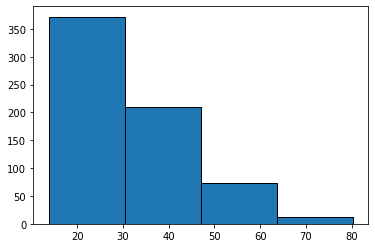

The range of the bins are [13.75  30.375 47.    63.625 80.25 ]
Frequency of the bins are [372. 209.  73.  12.]


In [91]:
n, bins, patches = plt.hist(data,bins = 4, edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
print("The range of the bins are",bins)
print("Frequency of the bins are",n)

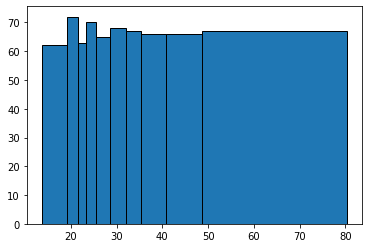

(array([13.75 , 19.17 , 21.598, 23.25 , 25.616, 28.5  , 32.134, 35.452,
        40.902, 48.58 , 80.25 ]),
 array([62., 72., 63., 70., 65., 68., 67., 66., 66., 67.]))

In [70]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(data, equalObs(data, 10), edgecolor='black')
plt.show()
bins,n

In [99]:
df3 = df.copy()
df3

,cont1,cont2,cont3,bool1,bool2,cont4,bool3,cont5,cont6,approval,credit.score,ages
0,30.83,0.000,1.25,t,t,1,f,202.0,0,+,664.60,42
1,58.67,4.460,3.04,t,t,6,f,43.0,560,+,693.88,54
2,24.50,0.500,1.50,t,f,0,f,280.0,824,+,621.82,29
3,27.83,1.540,3.75,t,t,5,t,100.0,3,+,653.97,58
4,20.17,5.625,1.71,t,f,0,f,120.0,0,+,670.26,65
...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,f,f,0,f,260.0,0,-,736.22,34
686,22.67,0.750,2.00,f,t,2,t,200.0,394,-,643.56,46
687,25.25,13.500,2.00,f,t,1,t,200.0,1,-,665.36,46
688,17.92,0.205,0.04,f,f,0,f,280.0,750,-,716.15,42


In [100]:
cut_labels = ['Red', 'Yellow', 'Blue', 'Green']
cut_bins = [13.75, 30.375, 47, 63.625, 80.25]
df3['v_bins'] = pd.cut(df3['cont1'], bins=cut_bins, labels=cut_labels)
df3

,cont1,cont2,cont3,bool1,bool2,cont4,bool3,cont5,cont6,approval,credit.score,ages,v_bins
0,30.83,0.000,1.25,t,t,1,f,202.0,0,+,664.60,42,Yellow
1,58.67,4.460,3.04,t,t,6,f,43.0,560,+,693.88,54,Blue
2,24.50,0.500,1.50,t,f,0,f,280.0,824,+,621.82,29,Red
3,27.83,1.540,3.75,t,t,5,t,100.0,3,+,653.97,58,Red
4,20.17,5.625,1.71,t,f,0,f,120.0,0,+,670.26,65,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,f,f,0,f,260.0,0,-,736.22,34,Red
686,22.67,0.750,2.00,f,t,2,t,200.0,394,-,643.56,46,Red
687,25.25,13.500,2.00,f,t,1,t,200.0,1,-,665.36,46,Red
688,17.92,0.205,0.04,f,f,0,f,280.0,750,-,716.15,42,Red


<AxesSubplot:>

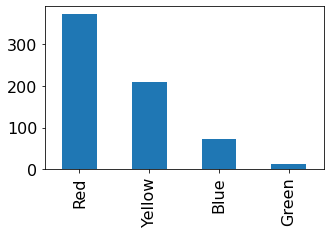

In [102]:
df3
plt.rcParams.update({'font.size': 16})
df3['v_bins'].value_counts().plot(kind='bar',figsize=(5,3))